In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm

In [2]:
data1 = loadmat('/content/ex6data1.mat')

In [11]:
y = data1['y']
x = data1['X']

In [31]:
svm_clf=svm.SVC(kernel='linear',C=1)

In [32]:
svm_clf.fit(x,y.ravel())

SVC(C=1, kernel='linear')

In [33]:
x0=np.linspace(0,5,200)

In [34]:
def plot_Svc_decision_boundary(scm_clf,xmin,xmax):
  w=svm_clf.coef_[0]
  b=svm_clf.intercept_[0]
  ##xmin and x max is the number line boundry
  x0=np.linspace(xmin,xmax,200)
  ##Decision boundry is : w0*x0+w1*x1+b=0
  ##so we get x1
  decision_boundry=-w[0]/w[1]*x0-b/w[1]
  margin=1/w[1]
  upperpart=decision_boundry+margin 
  lowerpart=decision_boundry-margin 
  ##now we need to  get the svms that model use to put shadow on them 
  svs=svm_clf.support_vectors_
  ## this svs contains the points which used to get the boundries its coloum 0 is point of x and it's coulom 1 is point of y so we draw red shadow on every point of them
  plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
  ## here we plot the decision boundry
  plt.plot(x0,decision_boundry,"k-",linewidth=2)
  ##here we plot the upper margin 
  plt.plot(x0,upperpart,"k--",linewidth=2)
  ##here we plot the lower margin 
  plt.plot(x0,lowerpart,"k--",linewidth=2)

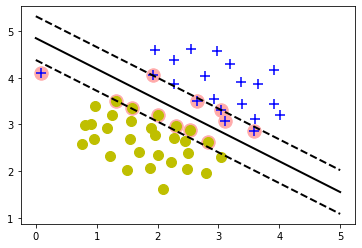

In [35]:
plot_Svc_decision_boundary(svm_clf,0,5)
pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(x[pos,0], x[pos,1], s=100, c='b', marker='+', linewidths=1)
plt.scatter(x[neg,0], x[neg,1], s=100, c='y', marker='o', linewidths=1)

In [36]:
print(f"The model accuracy is {round(svm_clf.score(x, y.ravel())*100,2)}%")

The model accuracy is 98.04%
